In [1]:
import folium
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Ruta al archivo GeoJSON
archivo_geojson = 'data/distritos_valencia.geojson'


# Crear un mapa centrado en Valencia
mapa_valencia = folium.Map(location=[39.4699, -0.3763], zoom_start=12)

# Añadir los barrios al mapa
folium.GeoJson(
    archivo_geojson,
    name='geojson'
).add_to(mapa_valencia)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_valencia)

# Mostrar el mapa
mapa_valencia


In [4]:
archivo_geojson = 'data/distritos_valencia.geojson'

mapa = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.GeoJson(
    archivo_geojson,
    name='geojson'
).add_to(mapa)

folium.LayerControl().add_to(mapa)

mapa


In [3]:
preciosdistrios = pd.read_csv("data/PrecioDistritosValencia2024.csv", sep=(","))
preciosdistrios

Distrito  Precio €/m2  Variación mensual  Variación trimestral  \
0            ALGIROS         2444                2.2                   7.6   
1          BENICALAP         1960                3.5                   8.3   
2         BENIMACLET         2362                0.3                   4.4   
3     CAMINS AL GRAU         2458                0.7                   2.9   
4           CAMPANAR         3020                2.6                  10.4   
5       CIUTAT VELLA         3273                1.2                   0.5   
6    EL PLA DEL REAL         3234                3.7                   8.0   
7          EXTRAMURS         2783                0.5                   4.2   
8              JESUS         1821                2.2                   2.2   
9         L'EIXAMPLE         3615                0.4                   2.9   
10       L'OLIVERETA         1726                2.6                   4.6   
11         LA SAIDIA         2029                1.5                   1.5   
12           PATRAIX         2001                4.3                   8.0   
13  POBLATS MARITIMS         2231                2.3                   2.9   
14   QUATRE CARRERES         2231                0.7                   7.4   
15          RASCANYA         1678                0.3                   8.2   

    Variación anual  Variación máximo  Precio_Historico Fecha_Historico  
0              15.8               0.0              2444      2024-03-01  
1              22.8              11.9              2224      2011-04-01  
2              20.2               0.0              2362      2024-03-01  
3              18.3               0.0              2458      2024-03-01  
4              27.7               0.0              3020      2024-03-01  
5               5.8               0.0              3273      2024-03-01  
6              16.7               0.0              3234      2024-03-01  
7              11.2               0.0              2783      2024-03-01  
8              19.4               0.0              1821      2024-03-01  
9              11.6               0.4              3629      2024-02-01  
10             12.7              12.0              1961      2010-02-01  
11             13.4               6.8              2178      2023-10-01  
12             20.1               0.0              2001      2024-03-01  
13             12.9               0.0              2231      2024-03-01  
14             10.9               0.1              2233      2023-10-01  
15             18.3               0.4              1684      2009-12-01

In [4]:
preciosdistrios.rename(columns={"Distrito":"nombre"}, inplace=1)
preciosdistrios

nombre  Precio €/m2  Variación mensual  Variación trimestral  \
0            ALGIROS         2444                2.2                   7.6   
1          BENICALAP         1960                3.5                   8.3   
2         BENIMACLET         2362                0.3                   4.4   
3     CAMINS AL GRAU         2458                0.7                   2.9   
4           CAMPANAR         3020                2.6                  10.4   
5       CIUTAT VELLA         3273                1.2                   0.5   
6    EL PLA DEL REAL         3234                3.7                   8.0   
7          EXTRAMURS         2783                0.5                   4.2   
8              JESUS         1821                2.2                   2.2   
9         L'EIXAMPLE         3615                0.4                   2.9   
10       L'OLIVERETA         1726                2.6                   4.6   
11         LA SAIDIA         2029                1.5                   1.5   
12           PATRAIX         2001                4.3                   8.0   
13  POBLATS MARITIMS         2231                2.3                   2.9   
14   QUATRE CARRERES         2231                0.7                   7.4   
15          RASCANYA         1678                0.3                   8.2   

    Variación anual  Variación máximo  Precio_Historico Fecha_Historico  
0              15.8               0.0              2444      2024-03-01  
1              22.8              11.9              2224      2011-04-01  
2              20.2               0.0              2362      2024-03-01  
3              18.3               0.0              2458      2024-03-01  
4              27.7               0.0              3020      2024-03-01  
5               5.8               0.0              3273      2024-03-01  
6              16.7               0.0              3234      2024-03-01  
7              11.2               0.0              2783      2024-03-01  
8              19.4               0.0              1821      2024-03-01  
9              11.6               0.4              3629      2024-02-01  
10             12.7              12.0              1961      2010-02-01  
11             13.4               6.8              2178      2023-10-01  
12             20.1               0.0              2001      2024-03-01  
13             12.9               0.0              2231      2024-03-01  
14             10.9               0.1              2233      2023-10-01  
15             18.3               0.4              1684      2009-12-01

In [5]:

# Crear un mapa centrado en Valencia
mapa_distritos = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

# Ruta al archivo GeoJSON
archivo_geojson = 'data/distritos_valencia.geojson'

folium.Choropleth(
    geo_data= archivo_geojson,
    name="choropleth",
    data= preciosdistrios,
    columns=["nombre","Precio €/m2"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="Precio Venta por Distrito 2024").add_to(mapa_distritos)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_distritos)

# Mostrar el mapa
mapa_distritos


In [6]:
import folium

archivo_geojson = 'data/coordenadasCPvalencia.geojson'

mapa_cp = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.GeoJson(
    archivo_geojson,
    name='geojson'
).add_to(mapa_cp)

folium.LayerControl().add_to(mapa_cp)

mapa_cp


In [7]:
rentabarrios = pd.read_csv(r"/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/data/rentas_barrios.csv", sep=(","))
rentabarrios

CP  Número de declaraciones  Renta bruta  \
0                     46001-El Pilar                     6025    226823521   
1                    46002-El Centro                     2399    135443556   
2                       46003-Carmen                     6365    284255570   
3                 46004-Pla de Remei                     5573    559068550   
4                     46005-Gran Vía                    11099    530543858   
5                       46006-Ruzafa                    26229    771284624   
6                      46007-Patraix                    24157    802363297   
7                    46008-Extramurs                    16752    602410846   
8                  46009-Marchalenes                    24056    664181534   
9                     46010-Mestalla                    15021    715365229   
10             46011-Poblet Maritims                    17031    453631948   
11                 46012-La Albufera                     3765    122079826   
12                      46013-Quatre                    10761    329544426   
13            46014-Barrio de La Luz                    20995    555889141   
14                    46015-Campanar                    24268    849937159   
15           46016-Tavernes Blanques                     1566     43960237   
16            46017-La Cruz Cubierto                    23552    575557553   
17                      46018-La Luz                    26233    696654279   
18                   46019-Torrefiel                    19593    497263552   
19                  46020-Benimaclet                    18167    592403091   
20                     46021-Algirós                    19186    655964152   
21                       46022-Ayora                    27751    805927215   
22            46023-La Crus Del Grao                    17545    708359033   
23                     46024-Nazaret                     5789    147456758   
24                   46025-Benicalap                    18579    472691701   
25                     46026-Malilla                    11712    308768047   
26          46035-Sant Pau-Benimanet                     6377    143837978   
27  46112-Massarrochos-Santa Bárbara                     1402     67699733   
28                             Resto                    18390    543975991   

    Rentas del trabajo  Peso del trabajo  Rentas del capital  \
0            151231279             66.67            25899047   
1             72028486             53.18            23566004   
2            173238948             60.94            39990475   
3            212717303             38.05            96789103   
4            334228652             63.00            66456616   
5            605063792             78.45            46545414   
6            606717446             75.62            62005788   
7            452386822             75.10            50282457   
8            545130781             82.08            32587211   
9            468740100             65.52            84281347   
10           370879106             81.76            21950654   
11            91744966             75.15             9883401   
12           259959202             78.88            19331857   
13           463197076             83.33            22737441   
14           677714616             79.74            52619634   
15            34480534             78.44             2780092   
16           490441299             85.21            19055863   
17           571623132             82.05            34844891   
18           412590295             82.97            19550829   
19           471901383             79.66            38419995   
20           514176868             78.38            46553929   
21           673371240             83.55            36740691   
22           516088157             72.86            53704465   
23           122431824             83.03             4647412   
24           399682696             84.55            16255855   
25           259092066       

In [8]:
rentabarrios.rename(columns={'nombre': 'Nombre'}, inplace=True)

In [9]:
accent_mapping = str.maketrans(
    'áéíóúÁÉÍÓÚüÜ',
    'aeiouAEIOUuU'
)

# Función para remover acentos y convertir a mayúsculas
def remove_accents_and_uppercase(text):
    return text.translate(accent_mapping).upper()

# Aplicar la función a la columna 'Ciudad'
rentabarrios['nombre'] = rentabarrios['nombre'].apply(remove_accents_and_uppercase)

KeyError: 'nombre'

In [10]:
rentabarrios

CP  Número de declaraciones  Renta bruta  \
0                     46001-El Pilar                     6025    226823521   
1                    46002-El Centro                     2399    135443556   
2                       46003-Carmen                     6365    284255570   
3                 46004-Pla de Remei                     5573    559068550   
4                     46005-Gran Vía                    11099    530543858   
5                       46006-Ruzafa                    26229    771284624   
6                      46007-Patraix                    24157    802363297   
7                    46008-Extramurs                    16752    602410846   
8                  46009-Marchalenes                    24056    664181534   
9                     46010-Mestalla                    15021    715365229   
10             46011-Poblet Maritims                    17031    453631948   
11                 46012-La Albufera                     3765    122079826   
12                      46013-Quatre                    10761    329544426   
13            46014-Barrio de La Luz                    20995    555889141   
14                    46015-Campanar                    24268    849937159   
15           46016-Tavernes Blanques                     1566     43960237   
16            46017-La Cruz Cubierto                    23552    575557553   
17                      46018-La Luz                    26233    696654279   
18                   46019-Torrefiel                    19593    497263552   
19                  46020-Benimaclet                    18167    592403091   
20                     46021-Algirós                    19186    655964152   
21                       46022-Ayora                    27751    805927215   
22            46023-La Crus Del Grao                    17545    708359033   
23                     46024-Nazaret                     5789    147456758   
24                   46025-Benicalap                    18579    472691701   
25                     46026-Malilla                    11712    308768047   
26          46035-Sant Pau-Benimanet                     6377    143837978   
27  46112-Massarrochos-Santa Bárbara                     1402     67699733   
28                             Resto                    18390    543975991   

    Rentas del trabajo  Peso del trabajo  Rentas del capital  \
0            151231279             66.67            25899047   
1             72028486             53.18            23566004   
2            173238948             60.94            39990475   
3            212717303             38.05            96789103   
4            334228652             63.00            66456616   
5            605063792             78.45            46545414   
6            606717446             75.62            62005788   
7            452386822             75.10            50282457   
8            545130781             82.08            32587211   
9            468740100             65.52            84281347   
10           370879106             81.76            21950654   
11            91744966             75.15             9883401   
12           259959202             78.88            19331857   
13           463197076             83.33            22737441   
14           677714616             79.74            52619634   
15            34480534             78.44             2780092   
16           490441299             85.21            19055863   
17           571623132             82.05            34844891   
18           412590295             82.97            19550829   
19           471901383             79.66            38419995   
20           514176868             78.38            46553929   
21           673371240             83.55            36740691   
22           516088157             72.86            53704465   
23           122431824             83.03             4647412   
24           399682696             84.55            16255855   
25           259092066       

In [11]:

# Crear un mapa centrado en Valencia
mapa_renta = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

# Ruta al archivo GeoJSON
archivo_geojson = 'data/distritos_valencia.geojson'

folium.Choropleth(
    geo_data= archivo_geojson,
    name="choropleth",
    data= rentabarrios,
    columns=["nombre","Renta bruta / pers"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="Media Renta Bruta por Persona y Barrio").add_to(mapa_renta)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_renta)

# Mostrar el mapa
mapa_renta


KeyError: "None of ['nombre'] are in the columns"

In [12]:
archivo_geojson = 'data/barrios_valencia.geojson'

mapa_barrios = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.GeoJson(
    archivo_geojson,
    name='geojson'
).add_to(mapa_barrios)

folium.LayerControl().add_to(mapa_barrios)

mapa_barrios


In [13]:

# Crear un mapa centrado en Valencia
mapa_renta2 = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

# Ruta al archivo GeoJSON
archivo_geojson = 'data/barrios_valencia.geojson'

folium.Choropleth(
    geo_data= archivo_geojson,
    name="choropleth",
    data= rentabarrios,
    columns=["Nombre","Renta bruta / pers"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="Media Renta Bruta por Persona y Barrio").add_to(mapa_renta2)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_renta2)

# Mostrar el mapa
mapa_renta2


KeyError: "None of ['Nombre'] are in the columns"

In [16]:
ibis2023 = pd.read_csv(r"/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/Ibis_agrupados_2023.csv", sep=(","))
ibis2023

nombre  Num. Recibos personalidad F  \
0            ALGIROS                      29925.0   
1          BENICALAP                      33307.0   
2         BENIMACLET                      23258.0   
3     CAMINS AL GRAU                      50458.0   
4           CAMPANAR                      32851.0   
5       CIUTAT VELLA                      25915.0   
6    EL PLA DEL REAL                      25288.0   
7          EXTRAMURS                      40837.0   
8              JESUS                      37127.0   
9         L'EIXAMPLE                      36972.0   
10       L'OLIVERETA                      31373.0   
11         LA SAIDIA                      35922.0   
12           PATRAIX                      44786.0   
13  POBLATS MARITIMS                      37481.0   
14  POBLES DE L'OEST                       9462.0   
15   POBLES DEL NORD                       4438.0   
16    POBLES DEL SUD                      20051.0   
17   QUATRE CARRERES                      54216.0   
18          RASCANYA                      37088.0   

    Num. Recibos personalidad J  Num.Recibos sin personalidad  \
0                        3073.0                         108.0   
1                        4134.0                          87.0   
2                        1941.0                          70.0   
3                        5734.0                         112.0   
4                        3958.0                         150.0   
5                       10243.0                         309.0   
6                        4148.0                        1009.0   
7                        5498.0                         161.0   
8                        2470.0                         131.0   
9                        6768.0                         337.0   
10                       2461.0                          43.0   
11                       3255.0                         163.0   
12                       3815.0                          77.0   
13                       5319.0                          89.0   
14                       1414.0                          15.0   
15                        287.0                          11.0   
16                       1806.0                          62.0   
17                       5132.0                         430.0   
18                       3195.0                          77.0   

    Num.Recibos Almacen-Estacionamiento  Num. Recibos Actv. Comercial  \
0                               10423.0                        1847.0   
1                               13417.0                        1403.0   
2                                7797.0                        1688.0   
3                               21142.0                        2452.0   
4                               16054.0                        1601.0   
5                               10508.0                        3468.0   
6                               12553.0                        1175.0   
7                               14936.0                        2913.0   
8                               11846.0                        2224.0   
9                               14221.0                        3314.0   
10                               7976.0                        1369.0   
11                              12176.0                        2360.0   
12                              17732.0                        2327.0   
13                               9006.0                        1900.0   
14                               2369.0                         425.0   
15                                651.0                          91.0   
16                               4158.0                         568.0   
17                              18878.0                        2056.0   
18                              13702.0                        1593.0   

    Num. Recibos Actv. Cultural  Num. Recibos Actv. Deportiva  \
0                          64.0                          18.0   
1                         131.0                          23.0

In [17]:
#MAPA DISTRINUCION MAYOR NUMERO DE PERSONAS FISICAS

mapa_persoF = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.Choropleth(
    geo_data= 'data/distritos_valencia.geojson',
    name="choropleth",
    data= ibis2023,
    columns=["nombre","Num. Recibos personalidad F"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="Nº Recibos IBI Persona Fisica 2023").add_to(mapa_persoF)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_persoF)

mapa_persoF.save(r'/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/imagenes/Nº Recibos IBI Persona Fisica 2023.html')

# Mostrar el mapa
mapa_persoF


In [18]:
#MAPA DISTRINUCION MAYOR NUMERO DE PERSONAS JURIDICA

mapa_persoJ = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.Choropleth(
    geo_data= 'data/distritos_valencia.geojson',
    name="choropleth",
    data= ibis2023,
    columns=["nombre","Num. Recibos personalidad J"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="Blues",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="Nº Recibodo IBI Persona Jurídica 2023").add_to(mapa_persoJ)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_persoJ)

mapa_persoJ.save(r'/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/imagenes/Nº Recibos IBI Persona Jurídica 2023.html')

# Mostrar el mapa
mapa_persoJ


In [19]:
preciosdistrios

nombre  Precio €/m2  Variación mensual  Variación trimestral  \
0            ALGIROS         2444                2.2                   7.6   
1          BENICALAP         1960                3.5                   8.3   
2         BENIMACLET         2362                0.3                   4.4   
3     CAMINS AL GRAU         2458                0.7                   2.9   
4           CAMPANAR         3020                2.6                  10.4   
5       CIUTAT VELLA         3273                1.2                   0.5   
6    EL PLA DEL REAL         3234                3.7                   8.0   
7          EXTRAMURS         2783                0.5                   4.2   
8              JESUS         1821                2.2                   2.2   
9         L'EIXAMPLE         3615                0.4                   2.9   
10       L'OLIVERETA         1726                2.6                   4.6   
11         LA SAIDIA         2029                1.5                   1.5   
12           PATRAIX         2001                4.3                   8.0   
13  POBLATS MARITIMS         2231                2.3                   2.9   
14   QUATRE CARRERES         2231                0.7                   7.4   
15          RASCANYA         1678                0.3                   8.2   

    Variación anual  Variación máximo  Precio_Historico Fecha_Historico  
0              15.8               0.0              2444      2024-03-01  
1              22.8              11.9              2224      2011-04-01  
2              20.2               0.0              2362      2024-03-01  
3              18.3               0.0              2458      2024-03-01  
4              27.7               0.0              3020      2024-03-01  
5               5.8               0.0              3273      2024-03-01  
6              16.7               0.0              3234      2024-03-01  
7              11.2               0.0              2783      2024-03-01  
8              19.4               0.0              1821      2024-03-01  
9              11.6               0.4              3629      2024-02-01  
10             12.7              12.0              1961      2010-02-01  
11             13.4               6.8              2178      2023-10-01  
12             20.1               0.0              2001      2024-03-01  
13             12.9               0.0              2231      2024-03-01  
14             10.9               0.1              2233      2023-10-01  
15             18.3               0.4              1684      2009-12-01

In [20]:
#MAPA DISTRINUCION MAYOR NUMERO DE PERSONAS FISICAS

mapa_variaAnual= folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.Choropleth(
    geo_data= 'data/distritos_valencia.geojson',
    name="choropleth",
    data= preciosdistrios,
    columns=["nombre","Variación anual"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="% Variación precio en el ultimo año").add_to(mapa_variaAnual)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_variaAnual)

mapa_variaAnual.save(r'/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/imagenes/Variación precio en el ultimo año.html')

# Mostrar el mapa
mapa_variaAnual


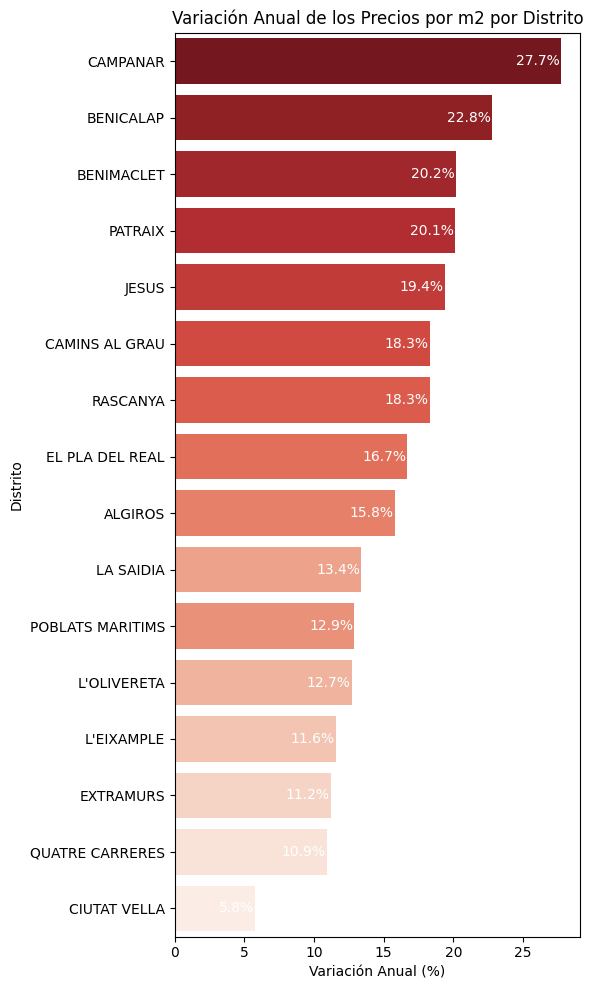

In [21]:
preciosdistritos_sorted = preciosdistrios.sort_values(by="Variación anual", ascending=False)

num_bars = preciosdistritos_sorted.shape[0]
red_palette = sns.color_palette("Reds", num_bars)

# Ordenar la paleta de colores de manera que el mayor valor tenga el color más intenso
red_palette_sorted = [red_palette[i] for i in preciosdistritos_sorted["Variación anual"].argsort()]


# Crear un histograma horizontal con Seaborn
plt.figure(figsize=(6, 10))
bars = sns.barplot(data=preciosdistritos_sorted, y="nombre", x="Variación anual", palette=red_palette_sorted)
plt.title('Variación Anual de los Precios por m2 por Distrito')
plt.xlabel('Variación Anual (%)')
plt.ylabel('Distrito')

for bar in bars.patches:
    # Format the percentage text
    percentage = f'{bar.get_width():.1f}%'
    # Set the x position of the text to be inside the bar
    x = bar.get_x() + bar.get_width() - 0.1 # Ajustar la posición hacia el interior
    y = bar.get_y() + bar.get_height() / 2
    plt.text(x, y, percentage, va='center', ha='right', color='white')  # Texto en blanco para mejorar la visibilidad

plt.tight_layout()
plt.savefig('imagenes/Variacion_Anual_Precios_Valencia.jpg', dpi=600, format='jpg')

plt.show()


In [22]:
ibis2023

nombre  Num. Recibos personalidad F  \
0            ALGIROS                      29925.0   
1          BENICALAP                      33307.0   
2         BENIMACLET                      23258.0   
3     CAMINS AL GRAU                      50458.0   
4           CAMPANAR                      32851.0   
5       CIUTAT VELLA                      25915.0   
6    EL PLA DEL REAL                      25288.0   
7          EXTRAMURS                      40837.0   
8              JESUS                      37127.0   
9         L'EIXAMPLE                      36972.0   
10       L'OLIVERETA                      31373.0   
11         LA SAIDIA                      35922.0   
12           PATRAIX                      44786.0   
13  POBLATS MARITIMS                      37481.0   
14  POBLES DE L'OEST                       9462.0   
15   POBLES DEL NORD                       4438.0   
16    POBLES DEL SUD                      20051.0   
17   QUATRE CARRERES                      54216.0   
18          RASCANYA                      37088.0   

    Num. Recibos personalidad J  Num.Recibos sin personalidad  \
0                        3073.0                         108.0   
1                        4134.0                          87.0   
2                        1941.0                          70.0   
3                        5734.0                         112.0   
4                        3958.0                         150.0   
5                       10243.0                         309.0   
6                        4148.0                        1009.0   
7                        5498.0                         161.0   
8                        2470.0                         131.0   
9                        6768.0                         337.0   
10                       2461.0                          43.0   
11                       3255.0                         163.0   
12                       3815.0                          77.0   
13                       5319.0                          89.0   
14                       1414.0                          15.0   
15                        287.0                          11.0   
16                       1806.0                          62.0   
17                       5132.0                         430.0   
18                       3195.0                          77.0   

    Num.Recibos Almacen-Estacionamiento  Num. Recibos Actv. Comercial  \
0                               10423.0                        1847.0   
1                               13417.0                        1403.0   
2                                7797.0                        1688.0   
3                               21142.0                        2452.0   
4                               16054.0                        1601.0   
5                               10508.0                        3468.0   
6                               12553.0                        1175.0   
7                               14936.0                        2913.0   
8                               11846.0                        2224.0   
9                               14221.0                        3314.0   
10                               7976.0                        1369.0   
11                              12176.0                        2360.0   
12                              17732.0                        2327.0   
13                               9006.0                        1900.0   
14                               2369.0                         425.0   
15                                651.0                          91.0   
16                               4158.0                         568.0   
17                              18878.0                        2056.0   
18                              13702.0                        1593.0   

    Num. Recibos Actv. Cultural  Num. Recibos Actv. Deportiva  \
0                          64.0                          18.0   
1                         131.0                          23.0

In [23]:
preciosdistrios

nombre  Precio €/m2  Variación mensual  Variación trimestral  \
0            ALGIROS         2444                2.2                   7.6   
1          BENICALAP         1960                3.5                   8.3   
2         BENIMACLET         2362                0.3                   4.4   
3     CAMINS AL GRAU         2458                0.7                   2.9   
4           CAMPANAR         3020                2.6                  10.4   
5       CIUTAT VELLA         3273                1.2                   0.5   
6    EL PLA DEL REAL         3234                3.7                   8.0   
7          EXTRAMURS         2783                0.5                   4.2   
8              JESUS         1821                2.2                   2.2   
9         L'EIXAMPLE         3615                0.4                   2.9   
10       L'OLIVERETA         1726                2.6                   4.6   
11         LA SAIDIA         2029                1.5                   1.5   
12           PATRAIX         2001                4.3                   8.0   
13  POBLATS MARITIMS         2231                2.3                   2.9   
14   QUATRE CARRERES         2231                0.7                   7.4   
15          RASCANYA         1678                0.3                   8.2   

    Variación anual  Variación máximo  Precio_Historico Fecha_Historico  
0              15.8               0.0              2444      2024-03-01  
1              22.8              11.9              2224      2011-04-01  
2              20.2               0.0              2362      2024-03-01  
3              18.3               0.0              2458      2024-03-01  
4              27.7               0.0              3020      2024-03-01  
5               5.8               0.0              3273      2024-03-01  
6              16.7               0.0              3234      2024-03-01  
7              11.2               0.0              2783      2024-03-01  
8              19.4               0.0              1821      2024-03-01  
9              11.6               0.4              3629      2024-02-01  
10             12.7              12.0              1961      2010-02-01  
11             13.4               6.8              2178      2023-10-01  
12             20.1               0.0              2001      2024-03-01  
13             12.9               0.0              2231      2024-03-01  
14             10.9               0.1              2233      2023-10-01  
15             18.3               0.4              1684      2009-12-01

In [24]:
dfvalencia = pd.merge(ibis2023, preciosdistrios, on="nombre", how="inner")

In [25]:
dfvalencia.to_csv('data/BI_datosdistritosvalencia.csv', index=False)

In [26]:
dfvalencia

nombre  Num. Recibos personalidad F  \
0            ALGIROS                      29925.0   
1          BENICALAP                      33307.0   
2         BENIMACLET                      23258.0   
3     CAMINS AL GRAU                      50458.0   
4           CAMPANAR                      32851.0   
5       CIUTAT VELLA                      25915.0   
6    EL PLA DEL REAL                      25288.0   
7          EXTRAMURS                      40837.0   
8              JESUS                      37127.0   
9         L'EIXAMPLE                      36972.0   
10       L'OLIVERETA                      31373.0   
11         LA SAIDIA                      35922.0   
12           PATRAIX                      44786.0   
13  POBLATS MARITIMS                      37481.0   
14   QUATRE CARRERES                      54216.0   
15          RASCANYA                      37088.0   

    Num. Recibos personalidad J  Num.Recibos sin personalidad  \
0                        3073.0                         108.0   
1                        4134.0                          87.0   
2                        1941.0                          70.0   
3                        5734.0                         112.0   
4                        3958.0                         150.0   
5                       10243.0                         309.0   
6                        4148.0                        1009.0   
7                        5498.0                         161.0   
8                        2470.0                         131.0   
9                        6768.0                         337.0   
10                       2461.0                          43.0   
11                       3255.0                         163.0   
12                       3815.0                          77.0   
13                       5319.0                          89.0   
14                       5132.0                         430.0   
15                       3195.0                          77.0   

    Num.Recibos Almacen-Estacionamiento  Num. Recibos Actv. Comercial  \
0                               10423.0                        1847.0   
1                               13417.0                        1403.0   
2                                7797.0                        1688.0   
3                               21142.0                        2452.0   
4                               16054.0                        1601.0   
5                               10508.0                        3468.0   
6                               12553.0                        1175.0   
7                               14936.0                        2913.0   
8                               11846.0                        2224.0   
9                               14221.0                        3314.0   
10                               7976.0                        1369.0   
11                              12176.0                        2360.0   
12                              17732.0                        2327.0   
13                               9006.0                        1900.0   
14                              18878.0                        2056.0   
15                              13702.0                        1593.0   

    Num. Recibos Actv. Cultural  Num. Recibos Actv. Deportiva  \
0                          64.0                          18.0   
1                         131.0                          23.0   
2                          20.0                           6.0   
3                          41.0                          16.0   
4                          25.0                          10.0   
5                          91.0                           4.0   
6                          45.0                          12.0   
7                          63.0                           8.0   
8                          80.0                          20.0   
9                          96.0                          17.0   
10                         49.0                  

In [30]:
dfvalencia

Num. Recibos personalidad F  Num. Recibos personalidad J  \
nombre                                                                       
ALGIROS                               29925.0                       3073.0   
BENICALAP                             33307.0                       4134.0   
BENIMACLET                            23258.0                       1941.0   
CAMINS AL GRAU                        50458.0                       5734.0   
CAMPANAR                              32851.0                       3958.0   
CIUTAT VELLA                          25915.0                      10243.0   
EL PLA DEL REAL                       25288.0                       4148.0   
EXTRAMURS                             40837.0                       5498.0   
JESUS                                 37127.0                       2470.0   
L'EIXAMPLE                            36972.0                       6768.0   
L'OLIVERETA                           31373.0                       2461.0   
LA SAIDIA                             35922.0                       3255.0   
PATRAIX                               44786.0                       3815.0   
POBLATS MARITIMS                      37481.0                       5319.0   
QUATRE CARRERES                       54216.0                       5132.0   
RASCANYA                              37088.0                       3195.0   

                  Num.Recibos sin personalidad  \
nombre                                           
ALGIROS                                  108.0   
BENICALAP                                 87.0   
BENIMACLET                                70.0   
CAMINS AL GRAU                           112.0   
CAMPANAR                                 150.0   
CIUTAT VELLA                             309.0   
EL PLA DEL REAL                         1009.0   
EXTRAMURS                                161.0   
JESUS                                    131.0   
L'EIXAMPLE                               337.0   
L'OLIVERETA                               43.0   
LA SAIDIA                                163.0   
PATRAIX                                   77.0   
POBLATS MARITIMS                          89.0   
QUATRE CARRERES                          430.0   
RASCANYA                                  77.0   

                  Num.Recibos Almacen-Estacionamiento  \
nombre                                                  
ALGIROS                                       10423.0   
BENICALAP                                     13417.0   
BENIMACLET                                     7797.0   
CAMINS AL GRAU                                21142.0   
CAMPANAR                                      16054.0   
CIUTAT VELLA                                  10508.0   
EL PLA DEL REAL                               12553.0   
EXTRAMURS                                     14936.0   
JESUS                                         11846.0   
L'EIXAMPLE                                    14221.0   
L'OLIVERETA                                    7976.0   
LA SAIDIA                                     12176.0   
PATRAIX                                       17732.0   
POBLATS MARITIMS                               9006.0   
QUATRE CARRERES                               18878.0   
RASCANYA                                      13702.0   

                  Num. Recibos Actv. Comercial  Num. Recibos Actv. Cultural  \
nombre                                                                        
ALGIROS                                 1847.0                         64.0   
BENICALAP                               1403.0                        131.0   
BENIMACLET                              1688.0                         20.0   
CAMINS AL GRAU                          2452.0                         41.0   
CAMPANAR                                1601.0                         25.0   
CIUTAT VELLA                            3468.0                         91.0   
EL PLA DEL REAL                         1175.0       

In [31]:
dfvalencia.drop(columns=['Fecha_Historico'], inplace=True)

In [32]:
dfvalencia

Num. Recibos personalidad F  Num. Recibos personalidad J  \
nombre                                                                       
ALGIROS                               29925.0                       3073.0   
BENICALAP                             33307.0                       4134.0   
BENIMACLET                            23258.0                       1941.0   
CAMINS AL GRAU                        50458.0                       5734.0   
CAMPANAR                              32851.0                       3958.0   
CIUTAT VELLA                          25915.0                      10243.0   
EL PLA DEL REAL                       25288.0                       4148.0   
EXTRAMURS                             40837.0                       5498.0   
JESUS                                 37127.0                       2470.0   
L'EIXAMPLE                            36972.0                       6768.0   
L'OLIVERETA                           31373.0                       2461.0   
LA SAIDIA                             35922.0                       3255.0   
PATRAIX                               44786.0                       3815.0   
POBLATS MARITIMS                      37481.0                       5319.0   
QUATRE CARRERES                       54216.0                       5132.0   
RASCANYA                              37088.0                       3195.0   

                  Num.Recibos sin personalidad  \
nombre                                           
ALGIROS                                  108.0   
BENICALAP                                 87.0   
BENIMACLET                                70.0   
CAMINS AL GRAU                           112.0   
CAMPANAR                                 150.0   
CIUTAT VELLA                             309.0   
EL PLA DEL REAL                         1009.0   
EXTRAMURS                                161.0   
JESUS                                    131.0   
L'EIXAMPLE                               337.0   
L'OLIVERETA                               43.0   
LA SAIDIA                                163.0   
PATRAIX                                   77.0   
POBLATS MARITIMS                          89.0   
QUATRE CARRERES                          430.0   
RASCANYA                                  77.0   

                  Num.Recibos Almacen-Estacionamiento  \
nombre                                                  
ALGIROS                                       10423.0   
BENICALAP                                     13417.0   
BENIMACLET                                     7797.0   
CAMINS AL GRAU                                21142.0   
CAMPANAR                                      16054.0   
CIUTAT VELLA                                  10508.0   
EL PLA DEL REAL                               12553.0   
EXTRAMURS                                     14936.0   
JESUS                                         11846.0   
L'EIXAMPLE                                    14221.0   
L'OLIVERETA                                    7976.0   
LA SAIDIA                                     12176.0   
PATRAIX                                       17732.0   
POBLATS MARITIMS                               9006.0   
QUATRE CARRERES                               18878.0   
RASCANYA                                      13702.0   

                  Num. Recibos Actv. Comercial  Num. Recibos Actv. Cultural  \
nombre                                                                        
ALGIROS                                 1847.0                         64.0   
BENICALAP                               1403.0                        131.0   
BENIMACLET                              1688.0                         20.0   
CAMINS AL GRAU                          2452.0                         41.0   
CAMPANAR                                1601.0                         25.0   
CIUTAT VELLA                            3468.0                         91.0   
EL PLA DEL REAL                         1175.0       

In [33]:
dfvalencia.corr()

Num. Recibos personalidad F  \
Num. Recibos personalidad F                                  1.000000   
Num. Recibos personalidad J                                  0.103680   
Num.Recibos sin personalidad                                -0.161226   
Num.Recibos Almacen-Estacionamiento                          0.800751   
Num. Recibos Actv. Comercial                                 0.233556   
Num. Recibos Actv. Cultural                                 -0.043323   
Num. Recibos Actv. Deportiva                                 0.236125   
Num.Recibos Actv.Edificio singular                          -0.306422   
Num. Recibos Actv. Espectaculos                              0.100082   
Num. Recibos Actv. Industrial                                0.591140   
Num.Recibos Actv.Obras Urbanizacion                          0.407587   
Num.Recibos Actv.Ocio y Hostaleria                          -0.147919   
Num. Recibos Actv. Oficinas                                 -0.177069   
Num. Recibos Actv. Religiosas                                0.100851   
Num. Recibos Actv. Residencial                               0.937988   
Num.Recibos Actv.Sanidad y Beneficiencia                     0.237991   
Num. Recibos totales                                         0.972033   
Importe Recibos personalidad F                               0.539456   
Importe Recibos personalidad J                               0.202662   
Importe Recibos sin personalidad                            -0.170197   
Imp.Recibos Actv.Almacen-Estacionamiento                     0.332462   
Imp. Recibos Actv. Comercial                                 0.079181   
Imp. Recibos Actv. Cultural                                  0.421251   
Imp. Recibos Actv. Deportiva                                 0.337555   
Imp.Recibos Actv.Edificio singular                           0.215882   
Imp. Recibos Actv. Espectaculos                              0.534944   
Imp. Recibos Actv. Industrial                                0.561904   
Imp.Recibos Actv.Obras urbanizacion                          0.704024   
Imp.Recibos Actv.Ocio y Hosteleria                           0.123449   
Imp. Recibos Actv. Oficinas                                 -0.249407   
Imp. Recibos Actv. Religiosas                                0.260433   
Imp. Recibos Actv. Residencial                               0.513627   
Imp.Recibos Actv.Sanidad y Beneficiencia                     0.410354   
Importe Recibos totales                                      0.385148   
Precio €/m2                                                 -0.255687   
Variación mensual                                           -0.181408   
Variación trimestral                                         0.031558   
Variación anual                                             -0.066220   
Variación máximo                                            -0.159693   
Precio_Historico                                            -0.294846   

                                          Num. Recibos personalidad J  \
Num. Recibos personalidad F                                  0.103680   
Num. Recibos personalidad J                                  1.000000   
Num.Recibos sin personalidad                                 0.251816   
Num.Recibos Almacen-Estacionamiento                          0.220128   
Num. Recibos Actv. Comercial                                 0.736522   
Num. Recibos Actv. Cultural                                  0.369090   
Num. Recibos Actv. Deportiva                                -0.200255   
Num.Recibos Actv.Edificio singular                           0.644746   
Num. Recibos Actv. Espectaculos                              0.530205   
Num. Recibos Actv. Industrial                                0.207074   
Num.Recibos Actv.Obras Urbanizacion                          0.210104   
Num.Recibos Actv.Ocio y Hostaleria                           0.910541   
Num. Recibos Actv. Oficinas                                  0.853883   
Num. Recibos Actv. Religio

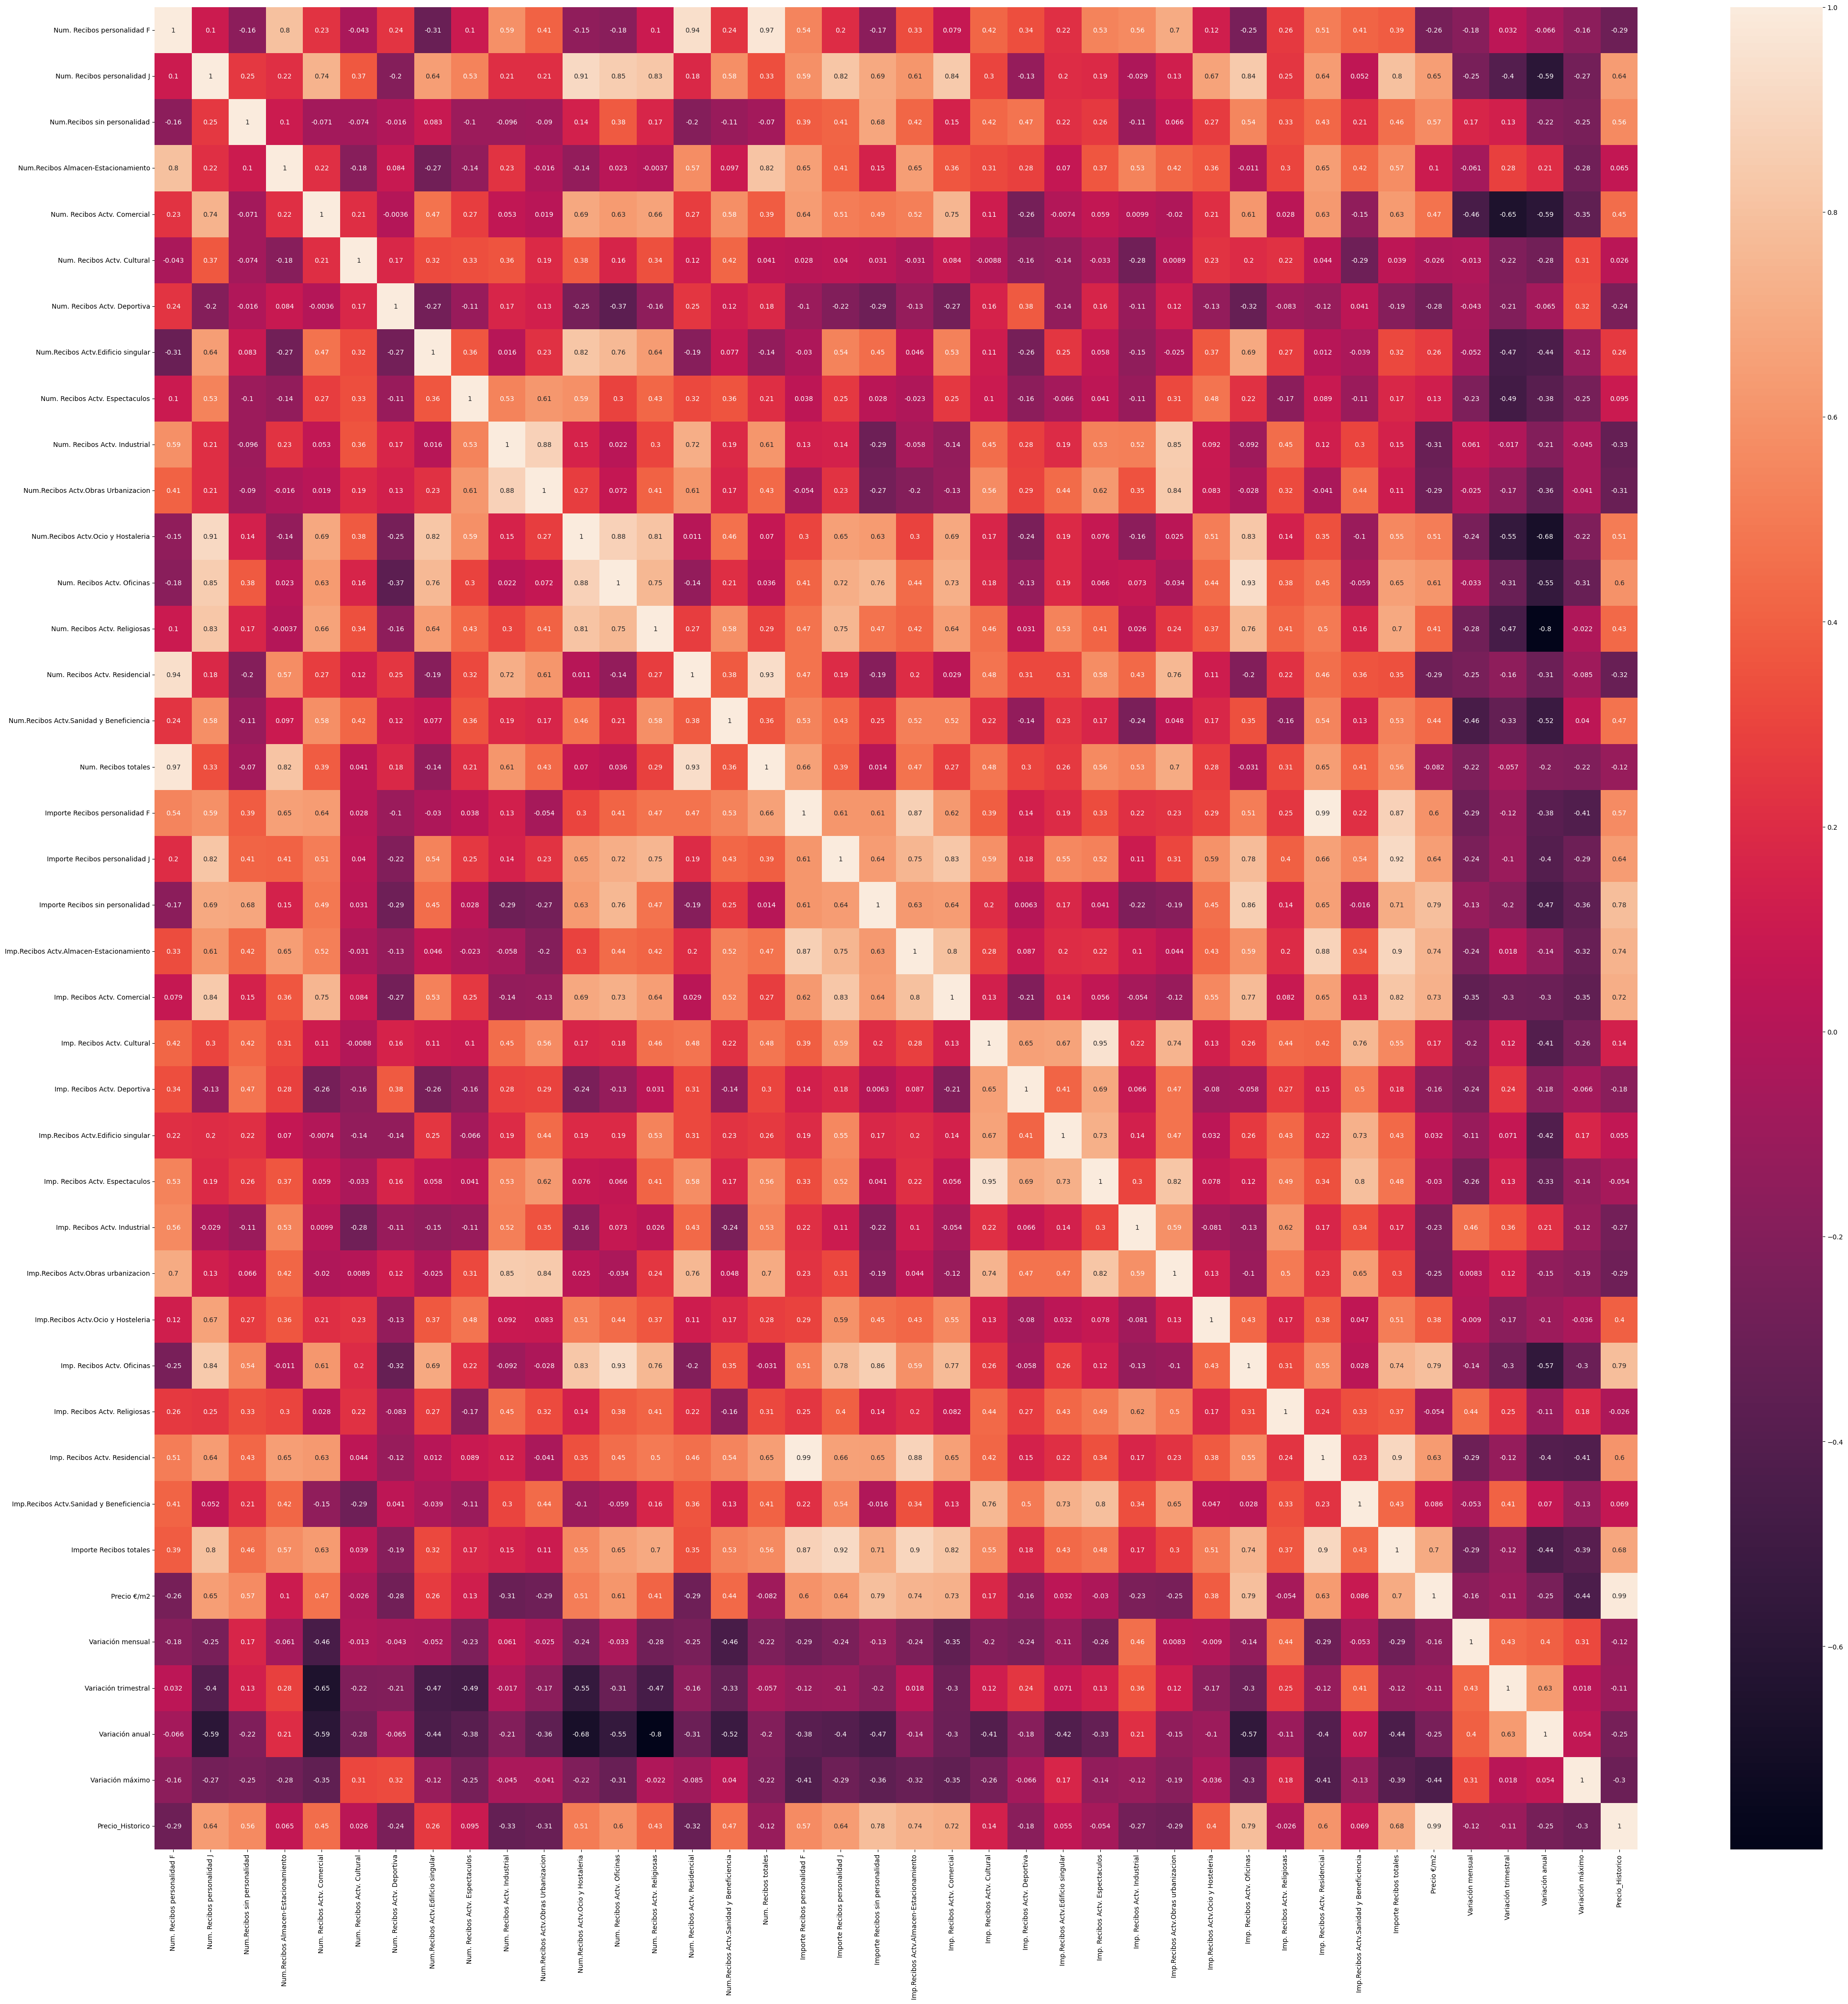

In [41]:


plt.figure(figsize=(50,50
                    ))  # Tamaño en pulgadas (ancho, alto)

sns.heatmap(dfvalencia.corr(), annot=True)

plt.savefig('headmap datos ibis.jpg', dpi=600, format='jpg')

plt.show()

In [43]:
dfvalencia.columns

Index(['Num. Recibos personalidad F', 'Num. Recibos personalidad J',
       'Num.Recibos sin personalidad', 'Num.Recibos Almacen-Estacionamiento',
       'Num. Recibos Actv. Comercial', 'Num. Recibos Actv. Cultural',
       'Num. Recibos Actv. Deportiva', 'Num.Recibos Actv.Edificio singular',
       'Num. Recibos Actv. Espectaculos', 'Num. Recibos Actv. Industrial',
       'Num.Recibos Actv.Obras Urbanizacion',
       'Num.Recibos Actv.Ocio y Hostaleria', 'Num. Recibos Actv. Oficinas',
       'Num. Recibos Actv. Religiosas', 'Num. Recibos Actv. Residencial',
       'Num.Recibos Actv.Sanidad y Beneficiencia', 'Num. Recibos totales',
       'Importe Recibos personalidad F', 'Importe Recibos personalidad J',
       'Importe Recibos sin personalidad',
       'Imp.Recibos Actv.Almacen-Estacionamiento',
       'Imp. Recibos Actv. Comercial', 'Imp. Recibos Actv. Cultural',
       'Imp. Recibos Actv. Deportiva', 'Imp.Recibos Actv.Edificio singular',
       'Imp. Recibos Actv. Espectaculos', 'I

In [50]:
#Num.Recibos Actv.Obras Urbanizacion

mapa_recobras = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.Choropleth(
    geo_data= 'data/distritos_valencia.geojson',
    name="choropleth",
    data= ibis2023,
    columns=["nombre","Num.Recibos Actv.Obras Urbanizacion"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="Blues",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="Num.Recibos Actv.Obras Urbanizacion 2023").add_to(mapa_recobras)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_recobras)

mapa_recobras.save(r'/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/imagenes/Num.Recibos Actv.Obras Urbanizacion.html')

# Mostrar el mapa
mapa_recobras

In [48]:
# Importe Recibos personalidad F
mapa_impPersoF = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.Choropleth(
    geo_data= 'data/distritos_valencia.geojson',
    name="choropleth",
    data= ibis2023,
    columns=["nombre","Importe Recibos personalidad F"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="Importe Recibos Pers Fisicas 2023").add_to(mapa_impPersoF)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_impPersoF)

mapa_impPersoF.save(r'/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/imagenes/Importe Recibos Pers Fisicas 2023.html')

# Mostrar el mapa
mapa_impPersoF

In [49]:
# Importe Recibos personalidad J
mapa_impPersoJ = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.Choropleth(
    geo_data= 'data/distritos_valencia.geojson',
    name="choropleth",
    data= ibis2023,
    columns=["nombre","Importe Recibos personalidad J"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="Blues",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="Importe Recibos Pers Fisicas 2023").add_to(mapa_impPersoJ)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_impPersoJ)

mapa_impPersoJ.save(r'/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/imagenes/Importe Recibos Pers Juridica 2023.html')

# Mostrar el mapa
mapa_impPersoJ

In [81]:
#Num. Recibos Actv. Residencial

mapa_actResid= folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.Choropleth(
    geo_data= 'data/distritos_valencia.geojson',
    name="choropleth",
    data= ibis2023,
    columns=["nombre","Num. Recibos Actv. Residencial"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="Num. Recibos Actv. Residencial").add_to(mapa_actResid)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_actResid)

mapa_actResid.save(r'/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/imagenes/Num. Recibos Actv. Residencial.html')

# Mostrar el mapa
mapa_actResid

In [ ]:
""" si divisimos el importe total recaudado en de ibi residencial , por su area, podremos obtener un valor normalizado de  que zonas tiene nu valor superior a otrs"""

In [57]:
distritos = pd.read_csv(r"/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/data/distritos.csv", sep=(";"))
distritos

objectid             Nombre  Código distrito  gis.gis.DISTRITOS.area  \
0          9       CIUTAT VELLA                1             1689851.625   
1         14              JESUS                9             2984760.000   
2          1    QUATRE CARRERES               10                     NaN   
3        167    POBLATS DEL SUD               19                     NaN   
4         23            PATRAIX                8                     NaN   
5        216   POBLATS DEL NORD               17                     NaN   
6          8    EL PLA DEL REAL                6             1692712.875   
7         10          EXTRAMURS                3             1971616.250   
8         12         L'EIXAMPLE                2             1733140.500   
9         71            ALGIROS               13                     NaN   
10       135           RASCANYA               15                     NaN   
11        87  POBLATS DE L'OEST               18                     NaN   
12       151        L'OLIVERETA                7                     NaN   
13       215   POBLATS DEL NORD               17                     NaN   
14       217   POBLATS DEL NORD               17                     NaN   
15       119          BENICALAP               16                     NaN   
16         6          LA SAIDIA                5             1943931.500   
17        13     CAMINS AL GRAU               12             2367473.250   
18       199   POBLATS DEL NORD               17                     NaN   
19        55         BENIMACLET               14                     NaN   
20       103           CAMPANAR                4                     NaN   
21       183   POBLATS MARITIMS               11                     NaN   

                                            geo_shape  \
0   {"coordinates": [[[-0.3810545927151668, 39.482...   
1   {"coordinates": [[[-0.388011313248574, 39.4621...   
2   {"coordinates": [[[-0.33584292591801684, 39.44...   
3   {"coordinates": [[[-0.4143525635090557, 39.459...   
4   {"coordinates": [[[-0.4143525635090557, 39.459...   
5   {"coordinates": [[[-0.355087364910183, 39.5259...   
6   {"coordinates": [[[-0.3622859877164847, 39.484...   
7   {"coordinates": [[[-0.3833952362210292, 39.481...   
8   {"coordinates": [[[-0.36453615919605226, 39.47...   
9   {"coordinates": [[[-0.342757228635524, 39.4870...   
10  {"coordinates": [[[-0.36769572194284833, 39.50...   
11  {"coordinates": [[[-0.4265075268247919, 39.494...   
12  {"coordinates": [[[-0.41293042982299194, 39.46...   
13  {"coordinates": [[[-0.426899715261974, 39.5623...   
14  {"coordinates": [[[-0.32960586149293514, 39.54...   
15  {"coordinates": [[[-0.3931263029506373, 39.504...   
16  {"coordinates": [[[-0.389470864329285, 39.4885...   
17  {"coordinates": [[[-0.3544116014080479, 39.471...   
18  {"coordinates": [[[-0.3198802224479743, 39.561...   
19  {"coordinates": [[[-0.3548897353875538, 39.478...   
20  {"coordinates": [[[-0.4265075268247919, 39.494...   
21  {"coordinates": [[[-0.3315104329274244, 39.485...   

                                geo_point_2d    latitud  longitud  
0   39.474415427888424, -0.37675969658141606  39.474415 -0.376760  
1     39.44820147753643, -0.3917921797268368  39.448201 -0.391792  
2    39.44509289592729, -0.35868167840872534  39.445093 -0.358682  
3    39.35589278378015, -0.34738500202809064  39.428320 -0.350590  
4    39.458397747932665, -0.4004125691493868  39.458398 -0.400413  
5    39.52468048556513, -0.35945821125735933  39.524680 -0.359458  
6      39.4745936913893, -0.3603780274174357  39.474594 -0.360378  
7     39.469024187643456, -0.385780005864596  39.469024 -0.385780  
8     39.46411452334249, -0.3704292703233094  39.464115 -0.370429  
9     39.47762702932769, -0.3427393297488325  39.477627 -0.342739  
10   39.495738628061105, -0.3676525156959352  39.495739 -0.367653  
11    39.49991943032566, -0.4177835654597659  39.499919 -0.417784  
12   39.468883412030706, -0.4033652971033445  39.468883 -0.

In [58]:
pip install geopandas shapely

Note: you may need to restart the kernel to use updated packages.


In [60]:
import geopandas as gpd
from shapely import wkt
from shapely.geometry import shape
import json


# Cargar el archivo CSV
df = pd.read_csv(r"/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/data/distritos.csv", sep=(";"))

# Convertir la columna de GeoJSON a geometrías de Shapely
def extract_geometry(geojson):
    return shape(json.loads(geojson))

# Aplica la función para convertir el texto GeoJSON en objetos geométricos
df['geometry'] = df['geo_shape'].apply(extract_geometry)

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Calcular el área en metros cuadrados (ajusta el CRS según sea necesario)
gdf = gdf.set_crs(epsg=4326)  # Asumiendo que está en latitud/longitud WGS84
gdf = gdf.to_crs(epsg=3857)  # Convierte a un CRS que permite cálculo de área en m^2
gdf['Area_m2'] = gdf['geometry'].area

# Muestra el resultado
print(gdf[['Nombre', 'Area_m2']])


               Nombre       Area_m2
0        CIUTAT VELLA  2.838445e+06
1               JESUS  5.009819e+06
2     QUATRE CARRERES  1.900653e+07
3     POBLATS DEL SUD  1.107797e+08
4             PATRAIX  4.822396e+06
5    POBLATS DEL NORD  2.020242e+06
6     EL PLA DEL REAL  2.843213e+06
7           EXTRAMURS  3.311250e+06
8          L'EIXAMPLE  2.910286e+06
9             ALGIROS  4.970492e+06
10           RASCANYA  4.418877e+06
11  POBLATS DE L'OEST  3.380738e+06
12        L'OLIVERETA  3.340370e+06
13   POBLATS DEL NORD  1.818290e+07
14   POBLATS DEL NORD  1.755476e+06
15          BENICALAP  3.724183e+06
16          LA SAIDIA  3.265771e+06
17     CAMINS AL GRAU  3.975148e+06
18   POBLATS DEL NORD  3.576867e+06
19         BENIMACLET  2.638689e+06
20           CAMPANAR  8.800770e+06
21   POBLATS MARITIMS  1.423049e+07


In [63]:
gdf

objectid             Nombre  Código distrito  gis.gis.DISTRITOS.area  \
0          9       CIUTAT VELLA                1             1689851.625   
1         14              JESUS                9             2984760.000   
2          1    QUATRE CARRERES               10                     NaN   
3        167    POBLATS DEL SUD               19                     NaN   
4         23            PATRAIX                8                     NaN   
5        216   POBLATS DEL NORD               17                     NaN   
6          8    EL PLA DEL REAL                6             1692712.875   
7         10          EXTRAMURS                3             1971616.250   
8         12         L'EIXAMPLE                2             1733140.500   
9         71            ALGIROS               13                     NaN   
10       135           RASCANYA               15                     NaN   
11        87  POBLATS DE L'OEST               18                     NaN   
12       151        L'OLIVERETA                7                     NaN   
13       215   POBLATS DEL NORD               17                     NaN   
14       217   POBLATS DEL NORD               17                     NaN   
15       119          BENICALAP               16                     NaN   
16         6          LA SAIDIA                5             1943931.500   
17        13     CAMINS AL GRAU               12             2367473.250   
18       199   POBLATS DEL NORD               17                     NaN   
19        55         BENIMACLET               14                     NaN   
20       103           CAMPANAR                4                     NaN   
21       183   POBLATS MARITIMS               11                     NaN   

                                            geo_shape  \
0   {"coordinates": [[[-0.3810545927151668, 39.482...   
1   {"coordinates": [[[-0.388011313248574, 39.4621...   
2   {"coordinates": [[[-0.33584292591801684, 39.44...   
3   {"coordinates": [[[-0.4143525635090557, 39.459...   
4   {"coordinates": [[[-0.4143525635090557, 39.459...   
5   {"coordinates": [[[-0.355087364910183, 39.5259...   
6   {"coordinates": [[[-0.3622859877164847, 39.484...   
7   {"coordinates": [[[-0.3833952362210292, 39.481...   
8   {"coordinates": [[[-0.36453615919605226, 39.47...   
9   {"coordinates": [[[-0.342757228635524, 39.4870...   
10  {"coordinates": [[[-0.36769572194284833, 39.50...   
11  {"coordinates": [[[-0.4265075268247919, 39.494...   
12  {"coordinates": [[[-0.41293042982299194, 39.46...   
13  {"coordinates": [[[-0.426899715261974, 39.5623...   
14  {"coordinates": [[[-0.32960586149293514, 39.54...   
15  {"coordinates": [[[-0.3931263029506373, 39.504...   
16  {"coordinates": [[[-0.389470864329285, 39.4885...   
17  {"coordinates": [[[-0.3544116014080479, 39.471...   
18  {"coordinates": [[[-0.3198802224479743, 39.561...   
19  {"coordinates": [[[-0.3548897353875538, 39.478...   
20  {"coordinates": [[[-0.4265075268247919, 39.494...   
21  {"coordinates": [[[-0.3315104329274244, 39.485...   

                                geo_point_2d    latitud  longitud  \
0   39.474415427888424, -0.37675969658141606  39.474415 -0.376760   
1     39.44820147753643, -0.3917921797268368  39.448201 -0.391792   
2    39.44509289592729, -0.35868167840872534  39.445093 -0.358682   
3    39.35589278378015, -0.34738500202809064  39.428320 -0.350590   
4    39.458397747932665, -0.4004125691493868  39.458398 -0.400413   
5    39.52468048556513, -0.35945821125735933  39.524680 -0.359458   
6      39.4745936913893, -0.3603780274174357  39.474594 -0.360378   
7     39.469024187643456, -0.385780005864596  39.469024 -0.385780   
8     39.46411452334249, -0.3704292703233094  39.464115 -0.370429   
9     39.47762702932769, -0.3427393297488325  39.477627 -0.342739   
10   39.495738628061105, -0.3676525156959352  39.495739 -0.367653   
11    39.49991943032566, -0.4177835654597659  39.499919 -0.417784   
12   39.468883412030706, -0.4033652971033445  

In [64]:
areasdistritos = gdf[['Nombre', 'Area_m2']]

In [65]:
areasdistritos

Nombre       Area_m2
0        CIUTAT VELLA  2.838445e+06
1               JESUS  5.009819e+06
2     QUATRE CARRERES  1.900653e+07
3     POBLATS DEL SUD  1.107797e+08
4             PATRAIX  4.822396e+06
5    POBLATS DEL NORD  2.020242e+06
6     EL PLA DEL REAL  2.843213e+06
7           EXTRAMURS  3.311250e+06
8          L'EIXAMPLE  2.910286e+06
9             ALGIROS  4.970492e+06
10           RASCANYA  4.418877e+06
11  POBLATS DE L'OEST  3.380738e+06
12        L'OLIVERETA  3.340370e+06
13   POBLATS DEL NORD  1.818290e+07
14   POBLATS DEL NORD  1.755476e+06
15          BENICALAP  3.724183e+06
16          LA SAIDIA  3.265771e+06
17     CAMINS AL GRAU  3.975148e+06
18   POBLATS DEL NORD  3.576867e+06
19         BENIMACLET  2.638689e+06
20           CAMPANAR  8.800770e+06
21   POBLATS MARITIMS  1.423049e+07

In [66]:
areasdistritos = areasdistritos.rename(columns={
    "Nombre": "nombre"})

In [72]:
dfvalencia.reset_index(inplace=True)

In [73]:
dfvalencia

nombre  Num. Recibos personalidad F  \
0            ALGIROS                      29925.0   
1          BENICALAP                      33307.0   
2         BENIMACLET                      23258.0   
3     CAMINS AL GRAU                      50458.0   
4           CAMPANAR                      32851.0   
5       CIUTAT VELLA                      25915.0   
6    EL PLA DEL REAL                      25288.0   
7          EXTRAMURS                      40837.0   
8              JESUS                      37127.0   
9         L'EIXAMPLE                      36972.0   
10       L'OLIVERETA                      31373.0   
11         LA SAIDIA                      35922.0   
12           PATRAIX                      44786.0   
13  POBLATS MARITIMS                      37481.0   
14   QUATRE CARRERES                      54216.0   
15          RASCANYA                      37088.0   

    Num. Recibos personalidad J  Num.Recibos sin personalidad  \
0                        3073.0                         108.0   
1                        4134.0                          87.0   
2                        1941.0                          70.0   
3                        5734.0                         112.0   
4                        3958.0                         150.0   
5                       10243.0                         309.0   
6                        4148.0                        1009.0   
7                        5498.0                         161.0   
8                        2470.0                         131.0   
9                        6768.0                         337.0   
10                       2461.0                          43.0   
11                       3255.0                         163.0   
12                       3815.0                          77.0   
13                       5319.0                          89.0   
14                       5132.0                         430.0   
15                       3195.0                          77.0   

    Num.Recibos Almacen-Estacionamiento  Num. Recibos Actv. Comercial  \
0                               10423.0                        1847.0   
1                               13417.0                        1403.0   
2                                7797.0                        1688.0   
3                               21142.0                        2452.0   
4                               16054.0                        1601.0   
5                               10508.0                        3468.0   
6                               12553.0                        1175.0   
7                               14936.0                        2913.0   
8                               11846.0                        2224.0   
9                               14221.0                        3314.0   
10                               7976.0                        1369.0   
11                              12176.0                        2360.0   
12                              17732.0                        2327.0   
13                               9006.0                        1900.0   
14                              18878.0                        2056.0   
15                              13702.0                        1593.0   

    Num. Recibos Actv. Cultural  Num. Recibos Actv. Deportiva  \
0                          64.0                          18.0   
1                         131.0                          23.0   
2                          20.0                           6.0   
3                          41.0                          16.0   
4                          25.0                          10.0   
5                          91.0                           4.0   
6                          45.0                          12.0   
7                          63.0                           8.0   
8                          80.0                          20.0   
9                          96.0                          17.0   
10                         49.0                  

In [77]:
dfvalencia_completo = pd.merge(dfvalencia, areasdistritos, on="nombre", how="inner")
dfvalencia_completo.to_csv('data/BI_datosdistritosvalencia_completo.csv', index=False)

In [76]:
# Imp. Recibos Actv. Residencial
mapa_impResid = folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.Choropleth(
    geo_data= 'data/distritos_valencia.geojson',
    name="choropleth",
    data= dfvalencia_completo,
    columns=["nombre","Imp. Recibos Actv. Residencial"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="Imp. Recibos Actv. Residencial").add_to(mapa_impResid)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_impPersoF)

mapa_impResid.save(r'/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/imagenes/Imp. Recibos Actv. Residencial.html')

# Mostrar el mapa
mapa_impResid

In [78]:
dfvalencia_completo


nombre  Num. Recibos personalidad F  \
0            ALGIROS                      29925.0   
1          BENICALAP                      33307.0   
2         BENIMACLET                      23258.0   
3     CAMINS AL GRAU                      50458.0   
4           CAMPANAR                      32851.0   
5       CIUTAT VELLA                      25915.0   
6    EL PLA DEL REAL                      25288.0   
7          EXTRAMURS                      40837.0   
8              JESUS                      37127.0   
9         L'EIXAMPLE                      36972.0   
10       L'OLIVERETA                      31373.0   
11         LA SAIDIA                      35922.0   
12           PATRAIX                      44786.0   
13  POBLATS MARITIMS                      37481.0   
14   QUATRE CARRERES                      54216.0   
15          RASCANYA                      37088.0   

    Num. Recibos personalidad J  Num.Recibos sin personalidad  \
0                        3073.0                         108.0   
1                        4134.0                          87.0   
2                        1941.0                          70.0   
3                        5734.0                         112.0   
4                        3958.0                         150.0   
5                       10243.0                         309.0   
6                        4148.0                        1009.0   
7                        5498.0                         161.0   
8                        2470.0                         131.0   
9                        6768.0                         337.0   
10                       2461.0                          43.0   
11                       3255.0                         163.0   
12                       3815.0                          77.0   
13                       5319.0                          89.0   
14                       5132.0                         430.0   
15                       3195.0                          77.0   

    Num.Recibos Almacen-Estacionamiento  Num. Recibos Actv. Comercial  \
0                               10423.0                        1847.0   
1                               13417.0                        1403.0   
2                                7797.0                        1688.0   
3                               21142.0                        2452.0   
4                               16054.0                        1601.0   
5                               10508.0                        3468.0   
6                               12553.0                        1175.0   
7                               14936.0                        2913.0   
8                               11846.0                        2224.0   
9                               14221.0                        3314.0   
10                               7976.0                        1369.0   
11                              12176.0                        2360.0   
12                              17732.0                        2327.0   
13                               9006.0                        1900.0   
14                              18878.0                        2056.0   
15                              13702.0                        1593.0   

    Num. Recibos Actv. Cultural  Num. Recibos Actv. Deportiva  \
0                          64.0                          18.0   
1                         131.0                          23.0   
2                          20.0                           6.0   
3                          41.0                          16.0   
4                          25.0                          10.0   
5                          91.0                           4.0   
6                          45.0                          12.0   
7                          63.0                           8.0   
8                          80.0                          20.0   
9                          96.0                          17.0   
10                         49.0                  

In [80]:
dfvalencia_completo["Imp. Recibos Actv. Residencial / m2"] = dfvalencia_completo["Imp. Recibos Actv. Residencial"] / dfvalencia_completo["Area_m2"]
dfvalencia_completo

nombre  Num. Recibos personalidad F  \
0            ALGIROS                      29925.0   
1          BENICALAP                      33307.0   
2         BENIMACLET                      23258.0   
3     CAMINS AL GRAU                      50458.0   
4           CAMPANAR                      32851.0   
5       CIUTAT VELLA                      25915.0   
6    EL PLA DEL REAL                      25288.0   
7          EXTRAMURS                      40837.0   
8              JESUS                      37127.0   
9         L'EIXAMPLE                      36972.0   
10       L'OLIVERETA                      31373.0   
11         LA SAIDIA                      35922.0   
12           PATRAIX                      44786.0   
13  POBLATS MARITIMS                      37481.0   
14   QUATRE CARRERES                      54216.0   
15          RASCANYA                      37088.0   

    Num. Recibos personalidad J  Num.Recibos sin personalidad  \
0                        3073.0                         108.0   
1                        4134.0                          87.0   
2                        1941.0                          70.0   
3                        5734.0                         112.0   
4                        3958.0                         150.0   
5                       10243.0                         309.0   
6                        4148.0                        1009.0   
7                        5498.0                         161.0   
8                        2470.0                         131.0   
9                        6768.0                         337.0   
10                       2461.0                          43.0   
11                       3255.0                         163.0   
12                       3815.0                          77.0   
13                       5319.0                          89.0   
14                       5132.0                         430.0   
15                       3195.0                          77.0   

    Num.Recibos Almacen-Estacionamiento  Num. Recibos Actv. Comercial  \
0                               10423.0                        1847.0   
1                               13417.0                        1403.0   
2                                7797.0                        1688.0   
3                               21142.0                        2452.0   
4                               16054.0                        1601.0   
5                               10508.0                        3468.0   
6                               12553.0                        1175.0   
7                               14936.0                        2913.0   
8                               11846.0                        2224.0   
9                               14221.0                        3314.0   
10                               7976.0                        1369.0   
11                              12176.0                        2360.0   
12                              17732.0                        2327.0   
13                               9006.0                        1900.0   
14                              18878.0                        2056.0   
15                              13702.0                        1593.0   

    Num. Recibos Actv. Cultural  Num. Recibos Actv. Deportiva  \
0                          64.0                          18.0   
1                         131.0                          23.0   
2                          20.0                           6.0   
3                          41.0                          16.0   
4                          25.0                          10.0   
5                          91.0                           4.0   
6                          45.0                          12.0   
7                          63.0                           8.0   
8                          80.0                          20.0   
9                          96.0                          17.0   
10                         49.0                  

In [85]:
# Imp. Recibos Actv. Residencial / m2
mapa_ImpActResidM2= folium.Map(location=[39.469260436754546, -0.367807852839496],
                  zoom_start=12.5, width=750, height=750, control_scale=True, tiles='CartoDB positron')

folium.Choropleth(
    geo_data= 'data/distritos_valencia.geojson',
    name="choropleth",
    data= dfvalencia_completo,
    columns=["nombre","Imp. Recibos Actv. Residencial / m2"],
    key_on= "feature.properties.nombre",
    nan_fill_color='white',  
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name ="Imp. Recibos Actv. Residencial / m2").add_to(mapa_ImpActResidM2)

# Añadir la capa de control para alternar la visibilidad del GeoJSON
folium.LayerControl().add_to(mapa_ImpActResidM2)

mapa_ImpActResidM2.save(r'/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/imagenes/Imp. Recibos Actv. Residencial m2.html')

# Mostrar el mapa
mapa_ImpActResidM2